**STOCK** **MARKET** **PREDICTION**

In [1]:
from IPython.display import Image
Image (url='https://miro.medium.com/v2/resize:fit:1000/0*dtiuqS8kNB66Mp5P',width =800)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [ ]:
data = pd.read_csv('/content/Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [ ]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [ ]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
hist = model.fit(X_train, y_train, epochs = 30, batch_size = 32, verbose=2)

Epoch 1/30
35/35 - 17s - loss: 0.0341 - 17s/epoch - 491ms/step
Epoch 2/30
35/35 - 7s - loss: 0.0118 - 7s/epoch - 210ms/step
Epoch 3/30
35/35 - 8s - loss: 0.0097 - 8s/epoch - 232ms/step
Epoch 4/30
35/35 - 7s - loss: 0.0085 - 7s/epoch - 195ms/step
Epoch 5/30
35/35 - 8s - loss: 0.0077 - 8s/epoch - 227ms/step
Epoch 6/30
35/35 - 7s - loss: 0.0093 - 7s/epoch - 208ms/step
Epoch 7/30
35/35 - 7s - loss: 0.0074 - 7s/epoch - 212ms/step
Epoch 8/30
35/35 - 8s - loss: 0.0066 - 8s/epoch - 226ms/step
Epoch 9/30
35/35 - 8s - loss: 0.0064 - 8s/epoch - 216ms/step
Epoch 10/30
35/35 - 8s - loss: 0.0062 - 8s/epoch - 233ms/step
Epoch 11/30
35/35 - 7s - loss: 0.0060 - 7s/epoch - 212ms/step
Epoch 12/30
35/35 - 7s - loss: 0.0060 - 7s/epoch - 208ms/step
Epoch 13/30
35/35 - 8s - loss: 0.0057 - 8s/epoch - 227ms/step
Epoch 14/30
35/35 - 7s - loss: 0.0059 - 7s/epoch - 190ms/step
Epoch 15/30
35/35 - 8s - loss: 0.0053 - 8s/epoch - 225ms/step
Epoch 16/30
35/35 - 7s - loss: 0.0056 - 7s/epoch - 193ms/step
Epoch 17/30
35/

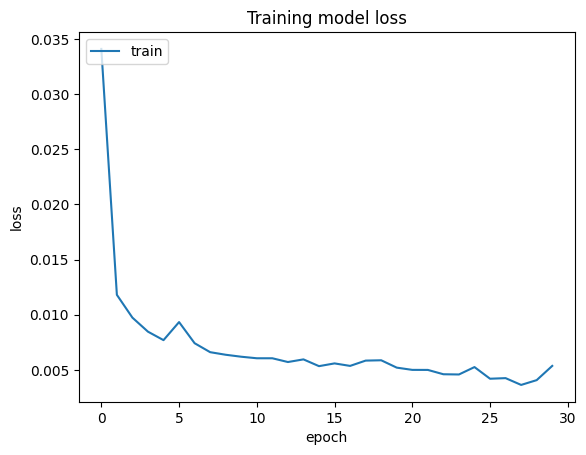

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
testData = pd.read_csv('/content/Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [ ]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 3s 87ms/step


array([[1.1753707],
       [1.1733402],
       [1.1863661],
       [1.2046162],
       [1.2131127],
       [1.2006061],
       [1.1760782],
       [1.1547501],
       [1.150465 ],
       [1.1580507],
       [1.153718 ],
       [1.1410285],
       [1.1319867],
       [1.1244005],
       [1.1277918],
       [1.1373352],
       [1.162969 ],
       [1.1955879],
       [1.2254837],
       [1.2500563],
       [1.2439023],
       [1.2240998],
       [1.1917261],
       [1.1602411],
       [1.1428775],
       [1.1441147],
       [1.1558615],
       [1.1620591],
       [1.1512452],
       [1.1359127],
       [1.1219872],
       [1.1077923],
       [1.0848864],
       [1.0586228],
       [1.0595552],
       [1.0849967],
       [1.1162817],
       [1.1398971],
       [1.1555927],
       [1.152789 ],
       [1.1579756],
       [1.1713986],
       [1.1890401],
       [1.2035047],
       [1.209756 ],
       [1.2039334],
       [1.1869675],
       [1.1799678],
       [1.1855997],
       [1.2007663],


In [ ]:
predicted_price = sc.inverse_transform(y_pred)

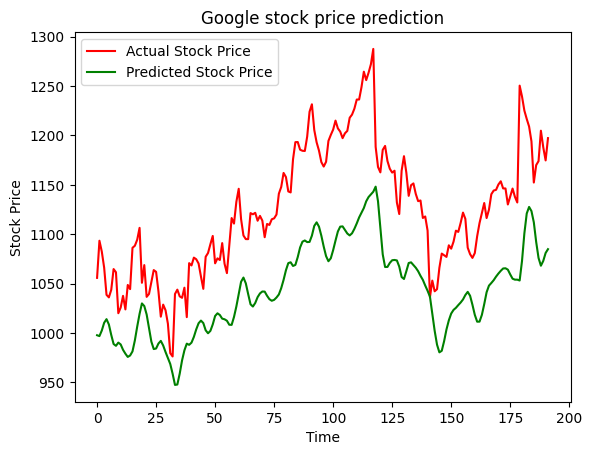

In [ ]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()